In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup as bs
import warnings
warnings.filterwarnings('ignore')

In [7]:
phone=[]

In [8]:
for i in range(1,21):
    ip=[]
    url="https://www.amazon.in/Apple-iPhone-13-128GB-Starlight/product-reviews/B09G9D8KRQ/ref=cm_cr_getr_d_paging_btm_prev_1?reviewerType=all_reviews&pageNumber=1"
    response=requests.get(url)
    soup=bs(response.content,"html.parser")
    reviews=soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        ip.append(reviews[i].text)
    phone = phone+ip

In [9]:
phone

['\n\n  This product is duplicate of iPhone 12 only camera design changed. Very low quality of this product Buy Samsung mobile phone\n\n',
 '\n\n  You should be a bigggggg bot to buy this phoneYou could get iPhone 12 Pro that’s the best 😂\n\n',
 '\n\n  There was a hairline scratch on the screen which is not clearly visible directly. When we tried contacting Amazon for the replacement, they asked us to connect to apple and when connected to apple, they asked to connect with Amazon. Blame game begins and we end up paying the price. Awfull service. I am going to tag on the social media both Amazon and apple. Such a big scam\n\n',
 '\n\n  Just but iphone 12!It’s not worth the money!Unless ur from BJP or something where you’re full with corrupt money, then go ahead.\n\n',
 '\n\n  i am poor and i cant afford it lmao xdxdxdxdxd so if you have money to flex buy it i am bored thats why i am writing this review while drinking coffee i have my chemistry exam on  manday and cant study mole concept

In [10]:
import re

In [11]:
review_string=" ".join(phone)

In [12]:
review_string=re.sub("[^a-zA-z" "]+"," ",review_string).lower()

In [13]:
review_string

' this product is duplicate of iphone only camera design changed very low quality of this product buy samsung mobile phone you should be a bigggggg bot to buy this phoneyou could get iphone pro that s the best there was a hairline scratch on the screen which is not clearly visible directly when we tried contacting amazon for the replacement they asked us to connect to apple and when connected to apple they asked to connect with amazon blame game begins and we end up paying the price awfull service i am going to tag on the social media both amazon and apple such a big scam just but iphone it s not worth the money unless ur from bjp or something where you re full with corrupt money then go ahead i am poor and i cant afford it lmao xdxdxdxdxd so if you have money to flex buy it i am bored thats why i am writing this review while drinking coffee i have my chemistry exam on manday and cant study mole concept and got bored thats why i came here to write this review if you read this review ti

In [14]:
review_string=review_string.split()

In [15]:
print(review_string)

['this', 'product', 'is', 'duplicate', 'of', 'iphone', 'only', 'camera', 'design', 'changed', 'very', 'low', 'quality', 'of', 'this', 'product', 'buy', 'samsung', 'mobile', 'phone', 'you', 'should', 'be', 'a', 'bigggggg', 'bot', 'to', 'buy', 'this', 'phoneyou', 'could', 'get', 'iphone', 'pro', 'that', 's', 'the', 'best', 'there', 'was', 'a', 'hairline', 'scratch', 'on', 'the', 'screen', 'which', 'is', 'not', 'clearly', 'visible', 'directly', 'when', 'we', 'tried', 'contacting', 'amazon', 'for', 'the', 'replacement', 'they', 'asked', 'us', 'to', 'connect', 'to', 'apple', 'and', 'when', 'connected', 'to', 'apple', 'they', 'asked', 'to', 'connect', 'with', 'amazon', 'blame', 'game', 'begins', 'and', 'we', 'end', 'up', 'paying', 'the', 'price', 'awfull', 'service', 'i', 'am', 'going', 'to', 'tag', 'on', 'the', 'social', 'media', 'both', 'amazon', 'and', 'apple', 'such', 'a', 'big', 'scam', 'just', 'but', 'iphone', 'it', 's', 'not', 'worth', 'the', 'money', 'unless', 'ur', 'from', 'bjp', 'o

In [16]:
len(review_string)

14625

In [17]:
import nltk

In [18]:
from nltk.corpus import stopwords

In [19]:
stp=stopwords.words('english')

In [20]:
no_stpwrd=[i for i in review_string if i not in stp]


In [22]:
len(no_stpwrd)

7680

In [23]:
clean_df=" ".join(no_stpwrd)

In [24]:
print(clean_df)

product duplicate iphone camera design changed low quality product buy samsung mobile phone bigggggg bot buy phoneyou could get iphone pro best hairline scratch screen clearly visible directly tried contacting amazon replacement asked us connect apple connected apple asked connect amazon blame game begins end paying price awfull service going tag social media amazon apple big scam iphone worth money unless ur bjp something full corrupt money go ahead poor cant afford lmao xdxdxdxdxd money flex buy bored thats writing review drinking coffee chemistry exam manday cant study mole concept got bored thats came write review read review til good justt wasted time go something productive money get phone dream get phone definitely fulfilled one day phone ever reading review suggest go phone apple marketing done quite good job month month keep people toes new launches nothing great phone android almost inception phones switching iphone pain guide help transfer critical data move ios doesnt work 

In [36]:
affin=pd.read_csv(r'C:\\Users\\ACER\\Downloads\\Afinn.csv',encoding='latin1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [37]:
affin_score=affin.set_index("word")["value"].to_dict()

In [38]:
affin_score

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [41]:
from nltk import tokenize

In [42]:
tknz=tokenize.sent_tokenize(" ".join(phone))

In [43]:
review_df=pd.DataFrame(tknz,columns=['reviews'])

In [44]:
review_df

,reviews
0,\n\n This product is duplicate of iPhone 12 o...
1,Very low quality of this product Buy Samsung m...
2,When we tried contacting Amazon for the replac...
3,Blame game begins and we end up paying the price.
4,Awfull service.
...,...
505,The Airtel does not offer eSIM for prepaid con...
506,Fortunately jio revised an eSIM that got activ...
507,The cinematic mode is good.This is my first ex...
508,Android is really more user friendly.Battery l...


In [39]:
import spacy

In [45]:
nlp=spacy.load("en_core_web_sm")
senti_data=affin_score

In [46]:
def calc_score(text:str=None):
    senti_score=0
    if text:
        sentance=nlp(text)
        for i in sentance:
            senti_score+=senti_data.get(i.lemma_,0)
        return senti_score    

In [48]:
review_df['sentimental_score']=review_df['reviews'].apply(calc_score)

In [49]:
review_df

,reviews,sentimental_score
0,\n\n This product is duplicate of iPhone 12 o...,0
1,Very low quality of this product Buy Samsung m...,4
2,When we tried contacting Amazon for the replac...,0
3,Blame game begins and we end up paying the price.,-3
4,Awfull service.,0
...,...,...
505,The Airtel does not offer eSIM for prepaid con...,0
506,Fortunately jio revised an eSIM that got activ...,0
507,The cinematic mode is good.This is my first ex...,6
508,Android is really more user friendly.Battery l...,5


In [50]:
#positive reviews
review_df[review_df['sentimental_score']>=0]

,reviews,sentimental_score
0,\n\n This product is duplicate of iPhone 12 o...,0
1,Very low quality of this product Buy Samsung m...,4
2,When we tried contacting Amazon for the replac...,0
4,Awfull service.,0
5,I am going to tag on the social media both Ama...,0
...,...,...
505,The Airtel does not offer eSIM for prepaid con...,0
506,Fortunately jio revised an eSIM that got activ...,0
507,The cinematic mode is good.This is my first ex...,6
508,Android is really more user friendly.Battery l...,5


In [51]:
#negetive reviews
review_df[review_df['sentimental_score']<0]

,reviews,sentimental_score
3,Blame game begins and we end up paying the price.,-3
37,Blame game begins and we end up paying the price.,-3
71,Blame game begins and we end up paying the price.,-3
105,Blame game begins and we end up paying the price.,-3
139,Blame game begins and we end up paying the price.,-3
173,Blame game begins and we end up paying the price.,-3
207,Blame game begins and we end up paying the price.,-3
241,Blame game begins and we end up paying the price.,-3
275,Blame game begins and we end up paying the price.,-3
309,Blame game begins and we end up paying the price.,-3


In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

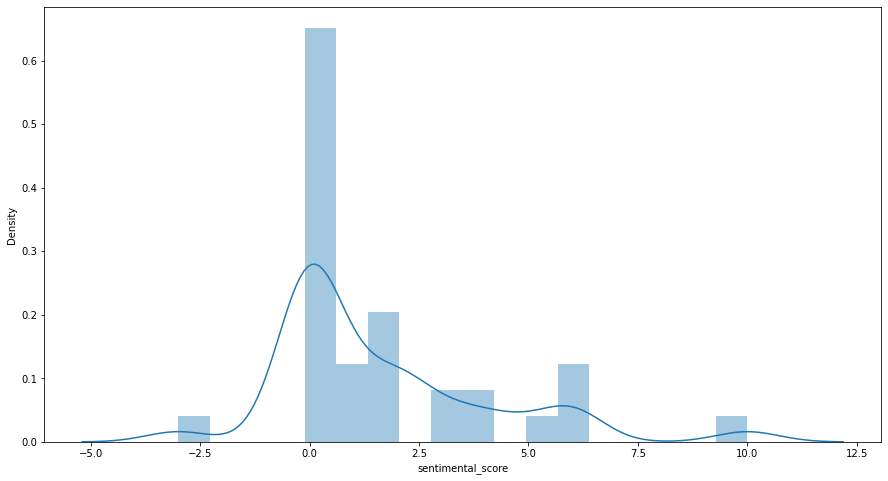

In [55]:
plt.figure(figsize=(15,8))
sns.distplot(review_df['sentimental_score'])
plt.show()